# Выбор локации для скважины

## Введение

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.
      
**Цель проекта:** Проанализировать данные проб нефти 10 000 месторождений из трёх регионов, где измерили качество нефти и объём её запасов. Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

**Данные:** 

  - Файлы с данными геологоразведки трех регионов.
 
 
  - *Признаки:* 
      
    - id — индекс строки в данных;   
    - d — уникальный идентификатор скважины;
    - f0, f1, f2 — три признака точек;
 
 
  - *Целевой признак:*
  
    - product — объём запасов в скважине (тыс. баррелей).
  
**План выполнения проекта:**

  - Загрузить и подготовить данные;
  - Обучить и проверить модель для каждого региона;
  - Подготовить данные для расчета прибыли;
  - Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели;
  - Посчитать риски и прибыль для каждого региона;
  - Сформулировать и оформить промежуточный и общий выводы.

## Загрузка и подготовка данных

In [1]:
# загружаем библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler

import numpy as np

import matplotlib.pyplot as plt

# настраиваем отображение 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
# объявляем константы (сохраняем в переменных ключевые значения для расчётов)
BUDGET = 10000000 #тыс.р. 
CHOOCE_POINTS = 500 
BEST_POINTS = 200 
PRICE_BARREL = 450 #тыс.р. 
RISK_THRESHOLD = 0.025

In [3]:
# читаем данные 
data1 = pd.read_csv('/datasets/geo_data_0.csv', sep=",")
data2 = pd.read_csv('/datasets/geo_data_1.csv', sep=",") 
data3 = pd.read_csv('/datasets/geo_data_2.csv', sep=",")

In [4]:
# изучаем данные
data1.info()
print()
data2.info()
print()
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

In [5]:
# изучаем первые строки
display(data1.head())
print()
display(data2.head())
print()
display(data3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


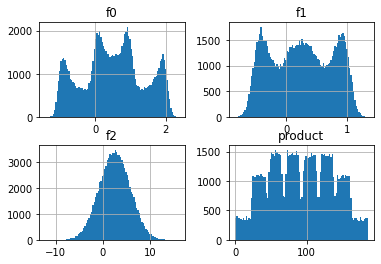

In [6]:
# изучаем графики с численными данными
data1.hist(bins=100);

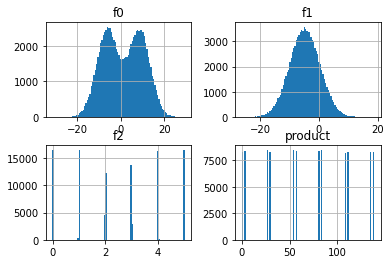

In [7]:
# изучаем графики с численными данными
data2.hist(bins=100);

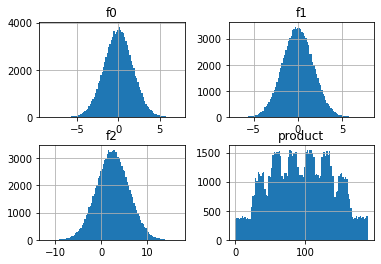

In [8]:
# изучаем графики с численными данными
data3.hist(bins=100);

In [9]:
# проверяем распределение и корреляцию в исходных датасетах
def statistic(data):    
    describe_data = data.describe()
    corr_data = data.corr()
    return describe_data, corr_data
          
print('Регион 1')    
display(statistic(data1))
print('Регион 2')
display(statistic(data2))
print('Регион 3')
display(statistic(data3))

Регион 1


(                  f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647      92.500000
 std         0.871832       0.504433       3.248248      44.288691
 min        -1.408605      -0.848218     -12.088328       0.000000
 25%        -0.072580      -0.200881       0.287748      56.497507
 50%         0.502360       0.250252       2.515969      91.849972
 75%         1.073581       0.700646       4.715088     128.564089
 max         2.362331       1.343769      16.003790     185.364347,
                f0        f1        f2   product
 f0       1.000000 -0.440723 -0.003153  0.143536
 f1      -0.440723  1.000000  0.001724 -0.192356
 f2      -0.003153  0.001724  1.000000  0.483663
 product  0.143536 -0.192356  0.483663  1.000000)

Регион 2


(                  f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541      68.825000
 std         8.965932       5.119872       1.703572      45.944423
 min       -31.609576     -26.358598      -0.018144       0.000000
 25%        -6.298551      -8.267985       1.000021      26.953261
 50%         1.153055      -4.813172       2.011479      57.085625
 75%         8.621015      -1.332816       3.999904     107.813044
 max        29.421755      18.734063       5.019721     137.945408,
                f0        f1        f2   product
 f0       1.000000  0.182287 -0.001777 -0.030491
 f1       0.182287  1.000000 -0.002595 -0.010155
 f2      -0.001777 -0.002595  1.000000  0.999397
 product -0.030491 -0.010155  0.999397  1.000000)

Регион 3


(                  f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.002023      -0.002081       2.495128      95.000000
 std         1.732045       1.730417       3.473445      44.749921
 min        -8.760004      -7.084020     -11.970335       0.000000
 25%        -1.162288      -1.174820       0.130359      59.450441
 50%         0.009424      -0.009482       2.484236      94.925613
 75%         1.158535       1.163678       4.858794     130.595027
 max         7.238262       7.844801      16.739402     190.029838,
                f0        f1        f2   product
 f0       1.000000  0.000528 -0.000448 -0.001987
 f1       0.000528  1.000000  0.000779 -0.001012
 f2      -0.000448  0.000779  1.000000  0.445871
 product -0.001987 -0.001012  0.445871  1.000000)

In [10]:
# ищем скрытые дубликаты в столбце id
print(data1.duplicated(subset='id').sum())
print(data2.duplicated(subset='id').sum())
print(data3.duplicated(subset='id').sum())

10
4
4


In [11]:
# ищем скрытые дубликаты в столбце product
print(data1.duplicated(subset='product').sum())
#смотрим доли уникальных значений
data1['product'].value_counts(normalize=True).head()

0


0.000000     0.00001
30.141653    0.00001
56.573577    0.00001
50.182301    0.00001
88.989990    0.00001
Name: product, dtype: float64

In [12]:
# ищем скрытые дубликаты в столбце product
print(data2.duplicated(subset='product').sum())
# смотрим доли уникальных значений
data2['product'].value_counts(normalize=True)

99988


53.906522     0.08472
26.953261     0.08468
84.038886     0.08431
57.085625     0.08390
3.179103      0.08337
80.859783     0.08320
30.132364     0.08306
134.766305    0.08304
110.992147    0.08303
0.000000      0.08235
137.945408    0.08233
107.813044    0.08201
Name: product, dtype: float64

In [13]:
# ищем скрытые дубликаты в столбце product
print(data3.duplicated(subset='product').sum())
# смотрим доли уникальных значений
data3['product'].value_counts(normalize=True).head()

0


0.000000     0.00001
53.211205    0.00001
37.811021    0.00001
84.266951    0.00001
38.939298    0.00001
Name: product, dtype: float64

In [14]:
# удаляем лишний столбец 
def drop(df):
    df.drop('id', axis=1, inplace=True)
    return df

dr1 = drop(data1)
dr2 = drop(data2)
dr3 = drop(data3)

In [15]:
# проверяем
dr1.info()
print()
dr2.info()
print()
dr3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f

### Вывод по первому шагу

  - **Загрузили библиотеки, прочитали файлы и изучили данные**.
  
  - **Выполнили предобработку**: 
  
     - данные без пропусков, распределены нормально, явные дубликаты отсутствуют;
     
     - во всех датасетах масштаб признаков f2 отличается от масштаба признаков f0 и f1, а также имеет высокую корреляцию со значениями целевого столбца. Причем, в датасете 2 корреляция f2 почти 1; 
     
     - в столбце 'id' обнаружили несколько повторяющихся значений, удалять не стали - скорее всего были допущены ошибки при заполнении, столбец;
     
     - в столбце 'product' второго региона обнаружили много дубликатов, странное распределение признаков и нулевые значения, составляющие больше 8%. Значимых уникальных значений вего 11. Скорее всего, это результат ручной разметки данных. Удалять нули не будем, чтобы не нарушать распределение. Тем более, что нули могут означать отсутствие посчитанных запасов;
     
     - 'id' не несет полезной нагрузки, поэтому его удаляем.

## Обучение и проверка модели

In [16]:
# создаем функцию формирования выборок и выделяем цель и признаки 
def split(df):
    target = df['product']
    features = df.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                target,
                                test_size=0.25,
                                random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [17]:
# формируем выборки
features_train_dr1, features_valid_dr1, target_train_dr1, target_valid_dr1 = split(dr1)
features_train_dr2, features_valid_dr2, target_train_dr2, target_valid_dr2 = split(dr2)
features_train_dr3, features_valid_dr3, target_train_dr3, target_valid_dr3 = split(dr3)

# проверяем размер итоговых выборок
print('Регион 1')
print(features_train_dr1.shape) 
print(features_valid_dr1.shape)
print(target_train_dr1.shape) 
print(target_valid_dr1.shape)
print('Регион 2')
print(features_train_dr2.shape) 
print(features_valid_dr2.shape)
print(target_train_dr2.shape) 
print(target_valid_dr2.shape)
print('Регион 3')
print(features_train_dr3.shape) 
print(features_valid_dr3.shape)
print(target_train_dr3.shape) 
print(target_valid_dr3.shape)

Регион 1
(75000, 3)
(25000, 3)
(75000,)
(25000,)
Регион 2
(75000, 3)
(25000, 3)
(75000,)
(25000,)
Регион 3
(75000, 3)
(25000, 3)
(75000,)
(25000,)


In [18]:
# создаем функцию работы модели 
def RMSE(features_train, target_train, features_valid, target_valid):
    # активируем модель 
    model = LinearRegression()
    # обучаем модель 
    model.fit(features_train, target_train) 
    # получаем и сохраняем предсказание модели на валидационной выборке
    predicted_valid = model.predict(features_valid)
    # вычисляем средний предказанный запас региона, тыс.барр. 
    predicted_valid_mean = predicted_valid.mean()
    # вычисляем метрику rmse
    rmse = mean_squared_error(target_valid, predicted_valid, squared=False)
    # создаем датафрейм с предсказаниями и целевыми значениями
    data = {'real_product': target_valid,
    'predicted_product': predicted_valid}
    data_product = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    
    return data_product, predicted_valid_mean, rmse   

In [19]:
# присваиваем переменные и получаем результат работы функции 
data_product_dr1, predicted_valid_mean_dr1, rmse_dr1 = RMSE(features_train_dr1, 
                                                               target_train_dr1, 
                                                               features_valid_dr1, 
                                                               target_valid_dr1)

data_product_dr2, predicted_valid_mean_dr2, rmse_dr2 = RMSE(features_train_dr2, 
                                                               target_train_dr2, 
                                                               features_valid_dr2, 
                                                               target_valid_dr2)

data_product_dr3, predicted_valid_mean_dr3, rmse_dr3 = RMSE(features_train_dr3, 
                                                               target_train_dr3, 
                                                               features_valid_dr3, 
                                                               target_valid_dr3)

print('Средний предсказанный запас 1 региона:', predicted_valid_mean_dr1,'RMSE =',rmse_dr1)
print('Средний предсказанный запас 2 региона:', predicted_valid_mean_dr2,'RMSE =',rmse_dr2)
print('Средний предсказанный запас 3 региона:', predicted_valid_mean_dr3,'RMSE =',rmse_dr3)

Средний предсказанный запас 1 региона: 92.59256778438035 RMSE = 37.5794217150813
Средний предсказанный запас 2 региона: 68.728546895446 RMSE = 0.893099286775617
Средний предсказанный запас 3 региона: 94.96504596800489 RMSE = 40.02970873393434


In [20]:
# проверяем качество модели кросс-валидацией
def model_score(features_valid,target_valid):
    model = LinearRegression()
    scores = cross_val_score(model, features_valid, target_valid, cv=10)
    final_score = scores.mean()
    return final_score

print('Средняя оценка качества 1 модели:', model_score(features_valid_dr1,target_valid_dr1))
print('Средняя оценка качества 2 модели:', model_score(features_valid_dr2,target_valid_dr2))
print('Средняя оценка качества 3 модели:', model_score(features_valid_dr3,target_valid_dr3))

Средняя оценка качества 1 модели: 0.2797816440875316
Средняя оценка качества 2 модели: 0.9996231266853546
Средняя оценка качества 3 модели: 0.2047430438936813


In [21]:
# проверяем модель на вменяемость на константной модели спомощью функции
def RMSE_constant(features_train, target_train, target_valid):
    #активируем модель 
    model = LinearRegression()
    #обучаем модель 
    model.fit(features_train, target_train) 
    #сохраняем предсказание  константной модели на валидационной выборке
    predicted_valid = pd.Series(target_train.mean(), index=target_valid.index)
    predicted_valid_mean_const = predicted_valid.mean()
    #вычисляем метрику rmse
    rmse_const = mean_squared_error(target_valid, predicted_valid, squared=False)
       
    return predicted_valid_mean_const, rmse_const  

In [22]:
# присваиваем переменные и получаем результат работы функции 
predicted_valid_mean_const_dr1, rmse_const_dr1 = RMSE_constant(features_train_dr1, 
                                                               target_train_dr1,                                                                
                                                               target_valid_dr1)

predicted_valid_mean_const_dr2, rmse_const_dr2 = RMSE_constant(features_train_dr2, 
                                                               target_train_dr2,                                                                
                                                               target_valid_dr2)

predicted_valid_mean_const_dr3, rmse_const_dr3 = RMSE_constant(features_train_dr3, 
                                                               target_train_dr3,                                                                
                                                               target_valid_dr3)

print('Средний предсказанный запас 1 региона:', predicted_valid_mean_const_dr1,'RMSE =',rmse_const_dr1)
print('Средний предсказанный запас 2 региона:', predicted_valid_mean_const_dr2,'RMSE =',rmse_const_dr2)
print('Средний предсказанный запас 3 региона:', predicted_valid_mean_const_dr3,'RMSE =',rmse_const_dr3)

Средний предсказанный запас 1 региона: 92.64046775305694 RMSE = 44.289591053907365
Средний предсказанный запас 2 региона: 68.85895465854665 RMSE = 46.02144533725462
Средний предсказанный запас 3 региона: 95.03858906371526 RMSE = 44.90234968510566


In [23]:
# проводим масштабирование признаков 1 и 3 регионов, и получаем предсказание 
# на обновленных выборках
def scaler(features_train, features_valid):
       
    # масштабируем количественные признаки
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)

    return features_train, features_valid

features_train_scal_dr1, features_valid_scal_dr1 = scaler(features_train_dr1,                                                           
                                                          features_valid_dr1)
features_train_scal_dr3, features_valid_scal_dr3 = scaler(features_train_dr3,                                                           
                                                          features_valid_dr3)

# проводим обучение и получаем предсказание после масштабирования признаков
def RMSE_constant(features_train, target_train, features_valid, target_valid):
    # обучаем модель и получаем предсказания
    model = LinearRegression()
    model.fit(features_train, target_train) 
    # сохраняем предсказание модели на валидационной выборке
    predicted_valid = model.predict(features_valid)
    predicted_valid_mean_scal = predicted_valid.mean()
    #вычисляем метрику rmse 
    rmse_scal = mean_squared_error(target_valid, predicted_valid, squared=False)
       
    return predicted_valid_mean_scal, rmse_scal

# присваиваем переменные и получаем результат работы функции 
predicted_valid_mean_scal_dr1, rmse_scal_dr1 = RMSE_constant(features_train_scal_dr1,
                                                             target_train_dr1,
                                                             features_valid_scal_dr1,
                                                             target_valid_dr1)

predicted_valid_mean_scal_dr3, rmse_scal_dr3 = RMSE_constant(features_train_scal_dr3,
                                                             target_train_dr3,
                                                             features_valid_scal_dr3,
                                                             target_valid_dr3)

# выводим итоговые показатели 
print('Средний предсказанный запас 1 региона:', predicted_valid_mean_scal_dr1,'RMSE =',rmse_scal_dr1)
print('Средний предсказанный запас 3 региона:', predicted_valid_mean_scal_dr3,'RMSE =',rmse_scal_dr3)

Средний предсказанный запас 1 региона: 92.59256778438035 RMSE = 37.5794217150813
Средний предсказанный запас 3 региона: 94.96504596800489 RMSE = 40.02970873393434


In [24]:
# сохраним фактический средний запас одной скважины по каждому региону, тыс.барр.
mean_barr_per_poin_dr1 = dr1['product'].mean()
mean_barr_per_poin_dr2 = dr2['product'].mean()
mean_barr_per_poin_dr3 = dr3['product'].mean()

print('Средний фактический запас 1 региона:',round(mean_barr_per_poin_dr1,2))
print('Средний фактический запас 2 региона:',round(mean_barr_per_poin_dr2,2))
print('Средний фактический запас 3 региона:',round(mean_barr_per_poin_dr3,2))

Средний фактический запас 1 региона: 92.5
Средний фактический запас 2 региона: 68.83
Средний фактический запас 3 региона: 95.0


In [25]:
# сохраним фактический суммарный запас скважин по каждому региону, тыс.барр.
barr_per_poin_dr1 = dr1['product'].sum()
barr_per_poin_dr2 = dr2['product'].sum()
barr_per_poin_dr3 = dr3['product'].sum()

print('Суммарный фактический запас 1 региона:',round(barr_per_poin_dr1,2)/200)
print('Суммарный фактический запас 2 региона:',round(barr_per_poin_dr2,2)/200)
print('Суммарный фактический запас 3 региона:',round(barr_per_poin_dr3,2)/200)

Суммарный фактический запас 1 региона: 46250.0
Суммарный фактический запас 2 региона: 34412.5
Суммарный фактический запас 3 региона: 47500.0


In [26]:
# создаем датафрейм, чтобы сравнить показатели моделей 
dt = {'Регион': ['Регион1','Регион2','Регион3'],
      'Предсказание базовой модели': [predicted_valid_mean_dr1,
                                      predicted_valid_mean_dr2,
                                      predicted_valid_mean_dr3],
      'Предсказание константной модели': [predicted_valid_mean_const_dr1,
                                          predicted_valid_mean_const_dr2,
                                          predicted_valid_mean_const_dr3],
      'Предсказание измененной модели':[predicted_valid_mean_scal_dr1,
                                       None,
                                       predicted_valid_mean_scal_dr3],      
      'Фактический запас':[mean_barr_per_poin_dr1,
                           mean_barr_per_poin_dr2, 
                           mean_barr_per_poin_dr3],
      'RSME_base': [rmse_dr1,
                    rmse_dr2,
                    rmse_dr3],
      'RSME_const':[rmse_const_dr1,
                    rmse_const_dr2,
                    rmse_const_dr3],
     'RSME_scal':[rmse_scal_dr1,
                 None,
                 rmse_scal_dr3]
     }
      
result = pd.DataFrame(data=dt) 

result

,Регион,Предсказание базовой модели,Предсказание константной модели,Предсказание измененной модели,Фактический запас,RSME_base,RSME_const,RSME_scal
0,Регион1,92.592568,92.640468,92.592568,92.500,37.579422,44.289591,37.579422
1,Регион2,68.728547,68.858955,NaN,68.825,0.893099,46.021445,NaN
2,Регион3,94.965046,95.038589,94.965046,95.000,40.029709,44.902350,40.029709


In [27]:
# строим график распределения объема предсказанных запасов на скважину
def plot(predict, bins, xlim_max, ylim_max):
    plt.figure(figsize=[8,6])
    
    plt.hist(predict, bins=bins)   
    plt.grid(visible=True)      
    
    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])
   
    plt.xlabel("Объем запасов на скважину, тыс. баррелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения объема запасов по скважинам")
    plt.show()

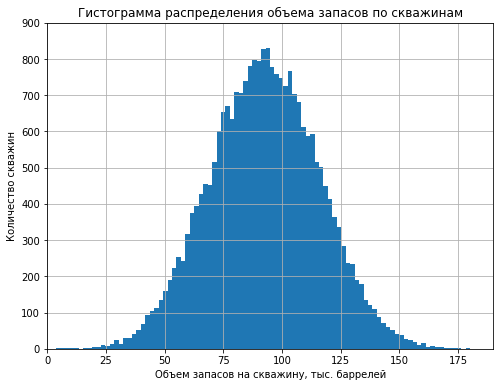

In [28]:
# первый регион
plot(data_product_dr1['predicted_product'],100,190,900);  

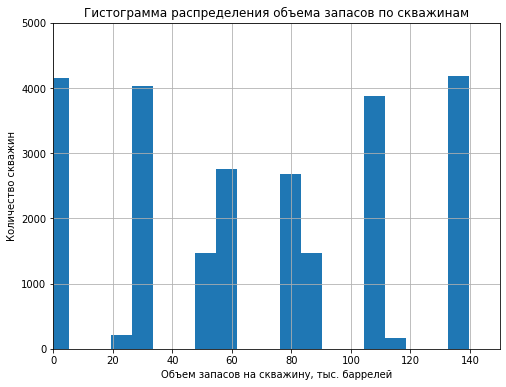

In [29]:
# второй регион
plot(data_product_dr2['predicted_product'],20,150,5000);   

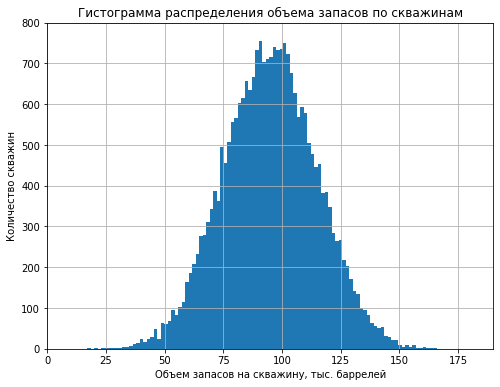

In [30]:
# второй регион
plot(data_product_dr3['predicted_product'],100,190,800);   

### Вывод по второму шагу

 -  Выделили цель и признаки и сформировали обучающие и валидационные выборки по каждому региону из расчета 75/25. 
 
 -  Обучили модель 'Линейной регрессии', предсказали и сохранили средний запас сырья, вычислили RMSE модели:
 
    - **В первом и третьем** регионе модель показала высокую **RSME** (**37,6 и 40 соответственно**); **Во втором** регионе **RMSE** почти идеальная (**0,89**) - сказывается разметка данных, хотя, возможно, модель переобучилась. 
 
 -  Проверили адекватность модели на константной модели, прогнозирующей  любому объекту среднее значение:
 
    - Предсказания константной модели более неточные, с более высоким уровнем ошибки, значит модель вменяма.      
    
 - Проверили качество кросс-валидацией:
 
    - Метрика качества предсказания по регионам 1 и 3 очень низкая. По второму региону - модель предсказывает очень точно. 
   
 - Провели масштабирование признаков по региону 1 и 3, с целью повысить обучаемость и качество предсказания модели:
 
   - Показатели не изменились.  
   
 - Значения предсказанных запасов на скважину в первом и третьем регионах распределены нормально. Во втором - распределение  дискретное, ровное (сказывается распределение признаков). Средние расчетные запасы на скважину **в первом и третьем регионах** почти одинаковы(**92,5 тыс.барр и 95 тыс.барр. соответственно**), **во втором регионе** запас на скважину самый низкий из всех(**68,8 тыс.барр.**).    

## Подготовка к расчёту прибыли

- Рассчитаем и сохраним в переменные ключевые значения для расчета прибыли.

In [32]:
mean_bud_point = BUDGET/BEST_POINTS
mean_barr_point =  mean_bud_point/PRICE_BARREL
mean_barr_region = mean_barr_point*BEST_POINTS #или budget/price_point

print('Средний бюджет на скважину:', round(mean_bud_point,2), 'тыс.руб.')
print('Средний безубыточный объем скважины:', round(mean_barr_point,2), 'тыс.барр.')
print('Средний безубыточный объем 200 скважин региона:', round(mean_barr_region,2), 'тыс.барр.')

Средний бюджет на скважину: 50000.0 тыс.руб.
Средний безубыточный объем скважины: 111.11 тыс.барр.
Средний безубыточный объем 200 скважин региона: 22222.22 тыс.барр.


In [33]:
# создаем датафрейм, чтобы сравнить предсказанные, расчетные и фактические показатели среднего объема 
# одной скважины, тыс.барр.
d = {'Средний запас скважины':['Предсказание','Расчет безубыточности','Факт'],
     'Регион 1':[predicted_valid_mean_dr1, mean_barr_point ,mean_barr_per_poin_dr1],
     'Регион 2':[predicted_valid_mean_dr2, mean_barr_point ,mean_barr_per_poin_dr2],
     'Регион 3':[predicted_valid_mean_dr3, mean_barr_point ,mean_barr_per_poin_dr3]
    }
res = pd.DataFrame(data=d)       

# выводим результат
display(res) 

,Средний запас скважины,Регион 1,Регион 2,Регион 3
0,Предсказание,92.592568,68.728547,94.965046
1,Расчет безубыточности,111.111111,111.111111,111.111111
2,Факт,92.500000,68.825000,95.000000


In [34]:
# создаем функцию для подстчета доходности на основе предсказания уровня запасов
def profit_probs(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    profit_probs = PRICE_BARREL * selected.sum() - BUDGET
    return  profit_probs

In [35]:
# рассчитываем для каждого региона средний запас лучших по предсказанию скважин 
def barr_sum(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]    
    return  round(selected.mean(),2)


mean_barr_per_poin_best_dr1 = barr_sum(data_product_dr1['real_product'],
                                       data_product_dr1['predicted_product'],
                                       BEST_POINTS)
mean_barr_per_poin_best_dr2 = barr_sum(data_product_dr2['real_product'],
                                       data_product_dr2['predicted_product'],
                                       BEST_POINTS)
mean_barr_per_poin_best_dr3 = barr_sum(data_product_dr3['real_product'],
                                       data_product_dr3['predicted_product'],
                                       BEST_POINTS)
print('Регион 1')
print('Cредний запас лучших по предсказанию скважин:',mean_barr_per_poin_best_dr1, 'тыс.барр.')
print('Регион 2')
print('Cредний запас лучших по предсказанию скважин:',mean_barr_per_poin_best_dr2,'тыс.барр.')
print('Регион 3')
print('Cредний запас лучших по предсказанию скважин:',mean_barr_per_poin_best_dr3,'тыс.барр.')

Регион 1
Cредний запас лучших по предсказанию скважин: 148.01 тыс.барр.
Регион 2
Cредний запас лучших по предсказанию скважин: 137.95 тыс.барр.
Регион 3
Cредний запас лучших по предсказанию скважин: 141.23 тыс.барр.


In [36]:
# сравниваем средний запас 200 лучших скважин со средним региона
d1={'Регион': [1,2,3],
    '200 лучших региона':[mean_barr_per_poin_best_dr1,
                          mean_barr_per_poin_best_dr2,
                          mean_barr_per_poin_best_dr3], 
    'Среднее региона': [mean_barr_per_poin_dr1,
                        mean_barr_per_poin_dr2,
                        mean_barr_per_poin_dr3],
   'Расчет безубыточности': [mean_barr_point,mean_barr_point,mean_barr_point]}

res1 = pd.DataFrame(d1)
print('Средний запас скважины, тыс.барр.')   
display(res1)        

Средний запас скважины, тыс.барр.


,Регион,200 лучших региона,Среднее региона,Расчет безубыточности
0,1,148.01,92.500,111.111111
1,2,137.95,68.825,111.111111
2,3,141.23,95.000,111.111111


### Вывод по третьему шагу

  - Посчитали и сохранили все бизнес-метрики, рассчитали средний объем, достаточный для безубыточной разработки новой скважины (111,11 тыс.барр.) и сравнили со средним предсказанным и средним фактическим запасом в каждом регионе:
    
    - Если считать средний запас на скважину в каждом регионе по всей выборке, его не достаточно для безубыточной добычи, так как в регионе много скважин с низким запасом, а во 2 регионе 9% скважин с нулевым запасом.   

  - Создали функцию, расчитали средний запас 200 лучших скважин и сравнили его с фактическим средним по региону и расчетному безубыточному: 
  
    - Расчеты показывают, что в каждом регионе в 200 отобранных лучших скважинах имеется достаточный запас для безубыточной добычи.  

## Расчёт прибыли и рисков 

In [37]:
# применяем будстреп с 1000 выборок, чтобы посчитать среднюю прибыль региона, 95% доверительный интервал 
# и процент риска 
state = np.random.RandomState(12345)

def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=CHOOCE_POINTS)
        probs_sample = probs[target_sample.index]
        profit = profit_probs(target, probs_sample, BEST_POINTS)
        if profit < 0:
            lost +=1
        values.append(profit) 
    
    values = pd.Series(values)
    lower = values.quantile(RISK_THRESHOLD)
    upper = values.quantile(1-RISK_THRESHOLD)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [38]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(data_product_dr1['real_product'],
                                                     data_product_dr1['predicted_product'])
print('Данные по 1 региону')
print(f'Средняя расчетная прибыль по региону = {round(average_1,2)} тыс.руб.')
print(f'95% доверительный интервал от {round(lower_1,2)} до {round(upper_1,2)} тыс.руб.')
print(f'Процент риска {round(risk_1*100,2)} %')

Данные по 1 региону
Средняя расчетная прибыль по региону = 396164.98 тыс.руб.
95% доверительный интервал от -111215.55 до 909766.94 тыс.руб.
Процент риска 6.9 %


In [39]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(data_product_dr2['real_product'],
                                                     data_product_dr2['predicted_product'])
print('Данные по 2 региону')
print(f'Средняя расчетная прибыль по региону = {round(average_2,2)} тыс.руб.')
print(f'95% доверительный интервал от {round(lower_2,2)} до {round(upper_2,2)} тыс.руб.')
print(f'Процент риска {round(risk_2*100,2)} %')

Данные по 2 региону
Средняя расчетная прибыль по региону = 461155.82 тыс.руб.
95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
Процент риска 0.7 %


In [40]:
average_3, lower_3, upper_3, risk_3 = bootstrap_1000(data_product_dr3['real_product'],
                                                     data_product_dr3['predicted_product'])
print('Данные по 3 региону')
print(f'Средняя расчетная прибыль по региону = {round(average_3,2)} тыс.руб.')
print(f'95% доверительный интервал от {round(lower_3,2)} до {round(upper_3,2)} тыс.руб.')
print(f'Процент риска {round(risk_3*100,2)} %')

Данные по 3 региону
Средняя расчетная прибыль по региону = 392950.48 тыс.руб.
95% доверительный интервал от -112227.63 до 934562.91 тыс.руб.
Процент риска 6.5 %


### Вывод по четвертому шагу

 - Посчитали прибыль, риски и доверительный интервал по трем регионам методом бутстрепа:
 
    - Несмотря на достаточный расчетный предсказанный запас лучших скважин, риски и расчетная прибыль по второму региону сильно отличаются от показателей первого и третьего регионов.


 - Мы отсеиваем первый и третий регионы, так как вероятность убытков при разработке новых скважн в них значительно превышает порог риска (2,5%) ( 6,9 и 6,5 соответсвенно), и оставляем второй регион с показателем вероятности убытков 0,7%.

## Общий вывод

 -  В процессе работы над проектом мы: 
   
    - Изучили данные и подготовили для моделирования;
    - Обучили модель и получили предсказания на валидационной выборке для трех регионов;
    - Создали функцию для расчета прибыли и убытков по регионам;
    - Посчитали прибыль, риски и доверительный интервал по каждому региону;
    - На основе расчетов рекомендовали регион для разработки. 


 -  **Резюме**:
    
    - **Лучший** регион (**Второй**) показал очень низкую **вероятность убытков - 0,7%** и  наивысшую среди соседей расчетную среднюю **прибыль 461155.82 тыс.руб.** на 95% доверительном **интервале (от 78050.81 до 862952.06 тыс.руб.)**.